Importing Necessary Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

ModuleNotFoundError: No module named 'matplotlib'

Importing the Dataset

In [3]:
df = pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dropping the "customerID" column because it is not necessary

In [5]:
df.drop(columns=["customerID"],inplace=True)

Converting the "TotalCharges" into floating point values and dropping the empty rows

In [6]:
df = df[df["TotalCharges"] != " "]
df['TotalCharges'] = df["TotalCharges"].astype(float)
df.shape

(7032, 20)

In [7]:
df['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

Printing the value counts of each categorical columns

In [8]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [9]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [10]:
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [11]:
df['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [12]:
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [13]:
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [14]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [15]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [16]:
df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [17]:
df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [18]:
df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [19]:
df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [20]:
df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [21]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [22]:
df['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [23]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [24]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Visualising the various important columns and their churning numbers

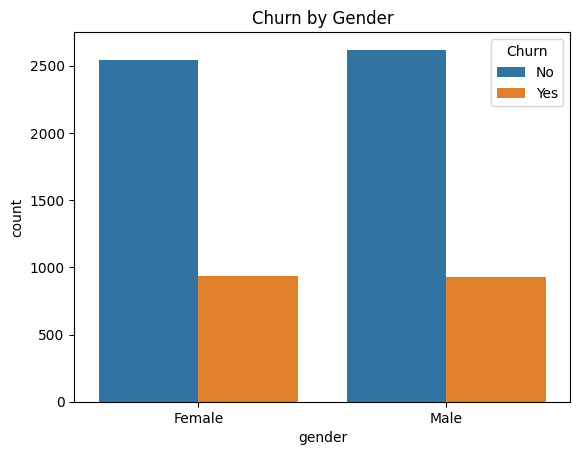

In [25]:
sns.countplot(
    data=df,
    x="gender",
    hue="Churn",
)
plt.title("Churn by Gender");

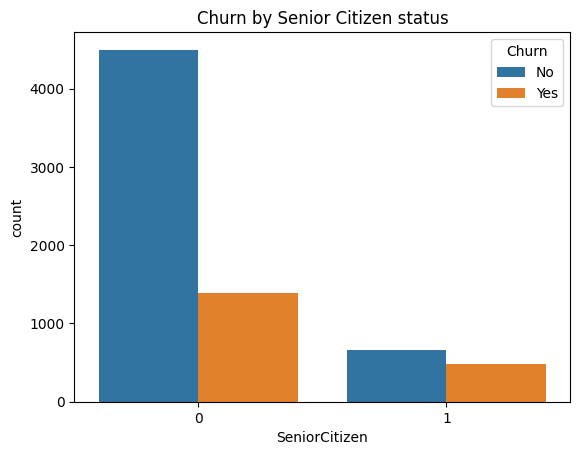

In [26]:
sns.countplot(
    data=df,
    x="SeniorCitizen",
    hue="Churn",
)
plt.title("Churn by Senior Citizen status");

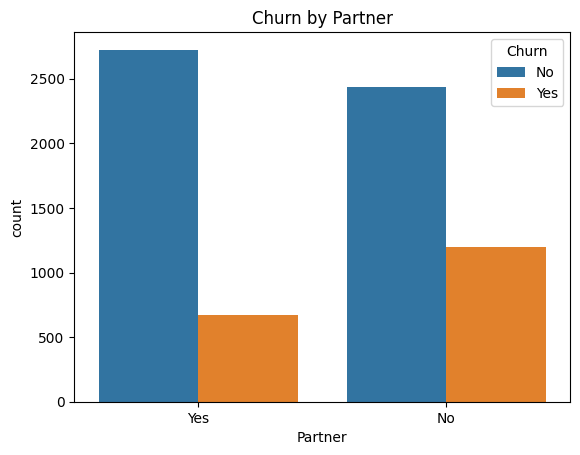

In [27]:
sns.countplot(
    data=df,
    x="Partner",
    hue="Churn",
)
plt.title("Churn by Partner");

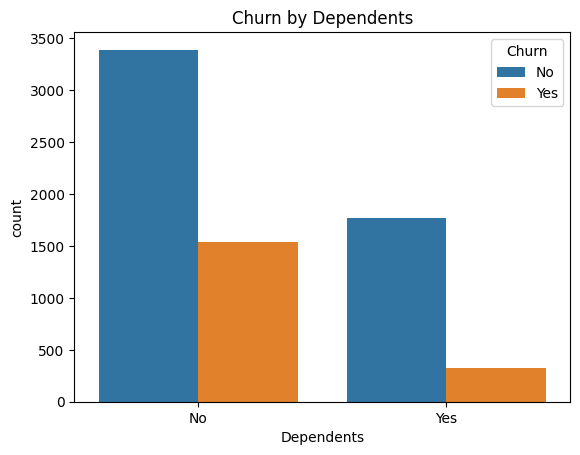

In [28]:
sns.countplot(
    data=df,
    x="Dependents",
    hue="Churn",
)
plt.title("Churn by Dependents");

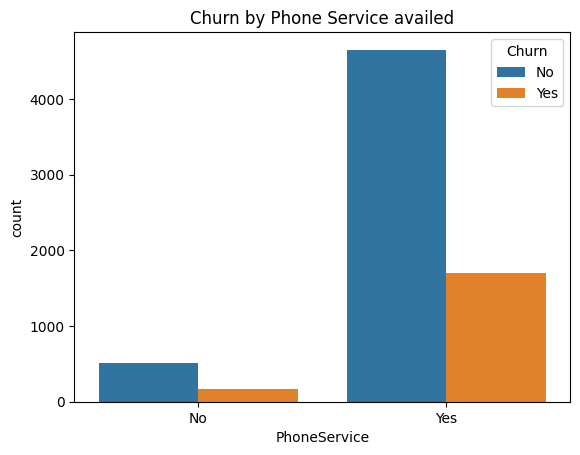

In [29]:
sns.countplot(
    data=df,
    x="PhoneService",
    hue="Churn",
)
plt.title("Churn by Phone Service availed");

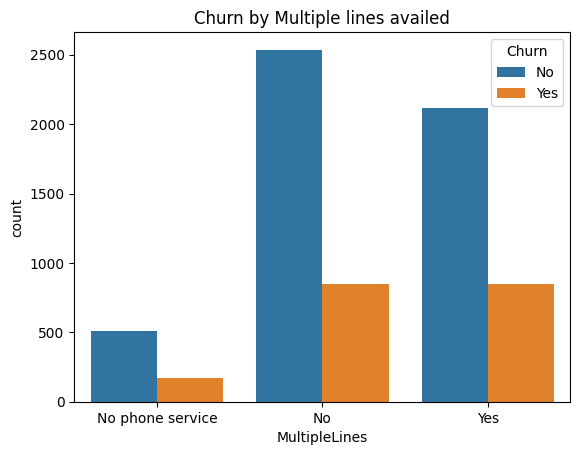

In [30]:
sns.countplot(
    data=df,
    x="MultipleLines",
    hue="Churn",
)
plt.title("Churn by Multiple lines availed");

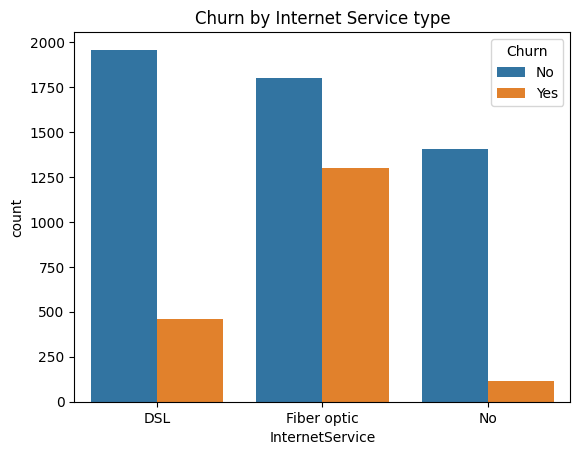

In [31]:
sns.countplot(
    data=df,
    x="InternetService",
    hue="Churn",
)
plt.title("Churn by Internet Service type");

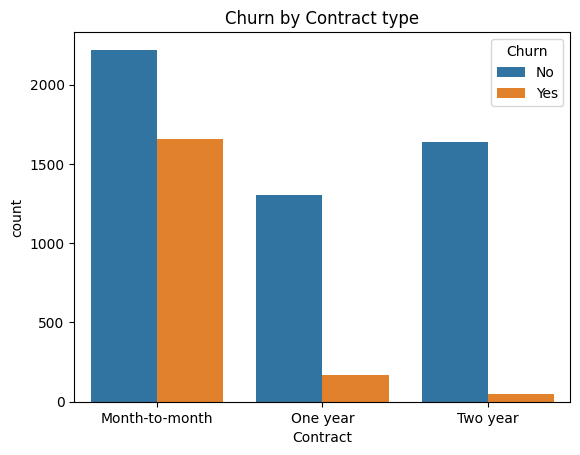

In [32]:
sns.countplot(
    data=df,
    x="Contract",
    hue="Churn",
)
plt.title("Churn by Contract type");

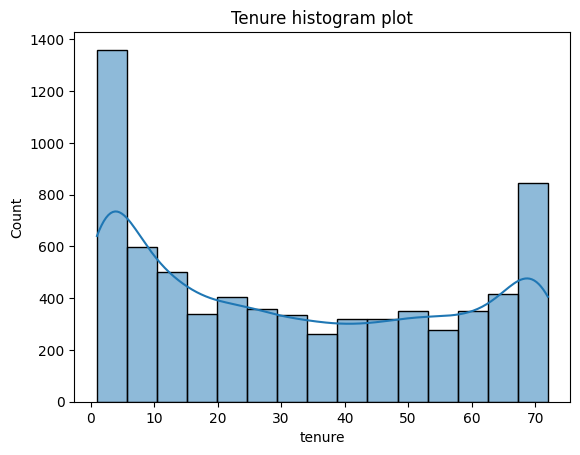

In [33]:
sns.histplot(
    data=df,
    x="tenure",
    bins='auto',
    kde=True
)
plt.title("Tenure histogram plot");

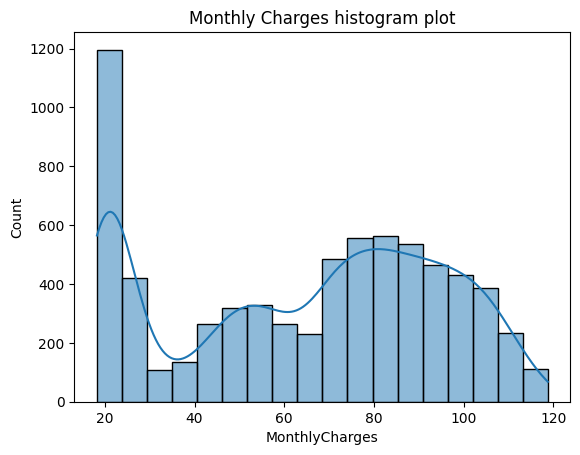

In [34]:
sns.histplot(
    data=df,
    x="MonthlyCharges",
    kde=True
)
plt.title("Monthly Charges histogram plot");

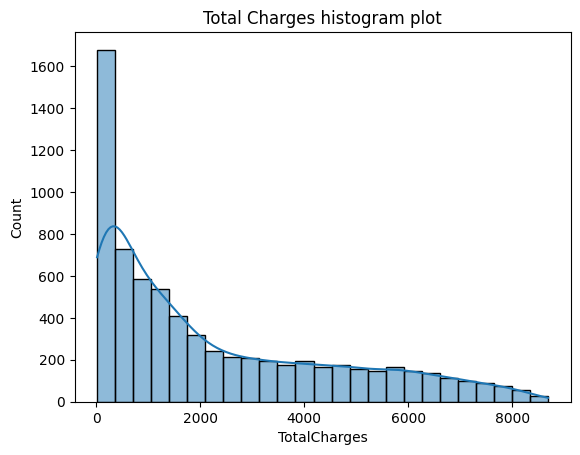

In [35]:
sns.histplot(
    data=df,
    x="TotalCharges",
    kde=True
)
plt.title("Total Charges histogram plot");

Replacing the categorical values to numeric values

In [36]:
df['gender'] = df["gender"].replace({"Male":0, "Female":1})

In [37]:
values_1 = {"Yes":1, "No":0}

df['Partner'] = df['Partner'].replace(values_1)
df['Dependents'] = df['Dependents'].replace(values_1)
df['PhoneService'] = df['PhoneService'].replace(values_1)
df['PaperlessBilling'] = df['PaperlessBilling'].replace(values_1)
df['Churn'] = df['Churn'].replace(values_1)

In [38]:
values_2 = {"Yes":1,"No":0,"No internet service":2}

df['OnlineSecurity'] = df['OnlineSecurity'].replace(values_2)
df['OnlineBackup'] = df['OnlineBackup'].replace(values_2)
df['DeviceProtection'] = df['DeviceProtection'].replace(values_2)
df['TechSupport'] = df['TechSupport'].replace(values_2)
df['StreamingTV'] = df['StreamingTV'].replace(values_2)
df['StreamingMovies'] = df['StreamingMovies'].replace(values_2)

In [39]:
df['MultipleLines'] = df['MultipleLines'].replace({"Yes":1,"No":0,"No phone service":2})
df['InternetService'] = df['InternetService'].replace({"Fiber optic":1,"No":0,"DSL":2})
df['Contract'] = df['Contract'].replace({"One year":1,"Month-to-month":0,"Two year":2})
df['PaymentMethod'] = df['PaymentMethod'].replace({"Electronic check":0,"Mailed check":1,"Bank transfer (automatic)":2,"Credit card (automatic)":3})

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


Splitting the features and vector from the dataset

In [41]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Splitting into Training set and Test set

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,) 

Applying Logistic Regression

In [43]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Printing the confusion matrix and calculating the accuracy

In [44]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[918 111]
 [169 209]]


0.8009950248756219